In [15]:
import os

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from src.models.odor_plumes import OdorPlumeFromMovie


### Traveling in the +x direction means walking downwind

<AxesSubplot:>

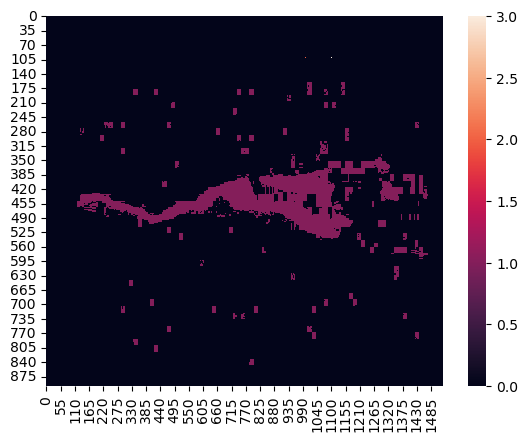

In [16]:
movie_path = os.path.join('..','src','data','plume_movies','intermittent_smoke.avi')
example_plume = OdorPlumeFromMovie(movie_file_path=movie_path)
example_plume.reset()
clipped_plume_frame = np.clip(example_plume.frame,a_min=0,a_max=1)
starting_point = [1000,100]
ending_point = [1100,100] # traveling in the +x direction
clipped_plume_frame[starting_point[0],starting_point[1]] = 2
clipped_plume_frame[ending_point[0],ending_point[1]] = 3
#Note that images get plotted with columns on x axis, and rows on y axis
#This is different from how the matrix is indexed by the ordered pair
#(x,y) where x specifies rows and y specifies columns
sns.heatmap(clipped_plume_frame.T)

Downwind steps should have $+x$ deviations, and upwind steps should have $-x$ deviations.
This is achieved, e.g., when wind angle is $0$ (as opposed to $\pi$)

In [18]:
from src.models.action_definitions import WalkActionEnum, WalkDisplacements
from src.models.wind_directions import WindDirections
movie_wind_directions = WindDirections(wind_angle=0)
movie_walk_displacements = WalkDisplacements(wind_params=movie_wind_directions)
movie_upwind_displacement = movie_walk_displacements.walk_displacements[WalkActionEnum.UPWIND]

[-5.000000e+00  6.123234e-16]


Which direction is "crosswind A" in the movie setting?

In [19]:
movie_crosswind_a_displacement = movie_walk_displacements.walk_displacements[WalkActionEnum.CROSS_A]
print(movie_crosswind_a_displacement)

[3.061617e-16 5.000000e+00]


If crosswind a is in the +y direction (note, "downwards" in heatmap), then down_a should be positive in the x and y directions. This corresponds to moving righwards and downwards in the heatmap.

In [21]:
movie_down_a_displacement = movie_walk_displacements.walk_displacements[WalkActionEnum.DOWN_A]
print(movie_down_a_displacement)

[3.53553391 3.53553391]
